In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 16

## Alameda County Jury Panels ##

In [2]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

# null: our jury panels were randomly selected from the population in alameda county
# alternative: our jury panels were NOT randomly selected (bias) from the pop
# statistic: TVD or Total Variation Distance, where we meausre distance between two columns (eligible and panels)
# and then take the sum and divide by 2
# TVD demonstrates the difference in our overall various ethnicity representation in our jury panel, and how it compares to the 
# TRUE proportion of ethnicities in the population
# larger TVD means more difference, looks less like population (overrepresentation/underrepresentation)
# smaller TVD means less difference, looks more like the population (equal or more appropriate representation)

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


**Question:** How could we visualize the data?

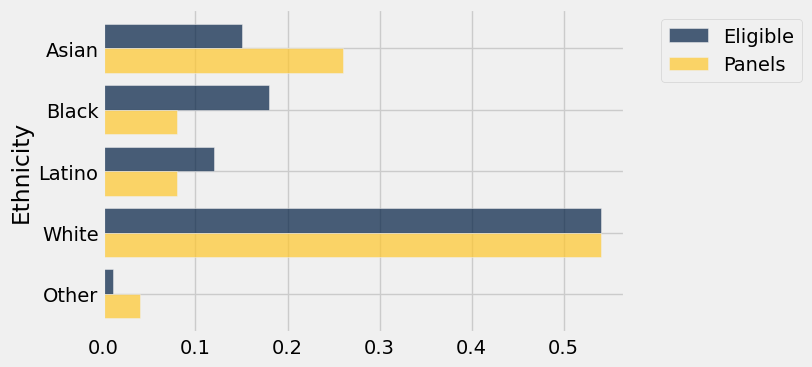

In [3]:
jury.barh('Ethnicity') # bar chart flipped horizontally

**Task:** Let's simulate under the assumption that the panel was selected randomly from the eligible population.
(There are 1423 people on the panel)

In [7]:
model = jury.column('Eligible')
model # this is our TRUE proportions of ethnicities in Alameda county
# first element is Asian, second is Black, ...

# let's simulate a random draw of 1423 jurors from the distribution
simulated = sample_proportions(1423, model)
len(simulated)
simulated

array([ 0.1468728 ,  0.17287421,  0.10962755,  0.55305692,  0.01756852])

**Task:** Let's 
- Add a single simulation to our table (as a new column)
- Visualize the eligible proportions, the panel proportions and the simulated proportions

In [10]:
# Add a single simulation to our table (as a new column)

# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian,0.15,0.26,0.146873
Black,0.18,0.08,0.172874
Latino,0.12,0.08,0.109628
White,0.54,0.54,0.553057
Other,0.01,0.04,0.0175685


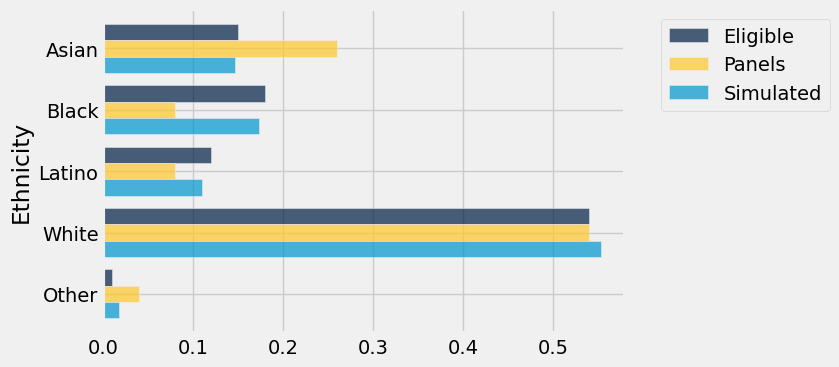

In [11]:
#Visualize the eligible proportions, the panel proportions and the simulated proportions
jury_with_simulated.barh('Ethnicity')

## Distance Between Distributions
In the last lecture, the difference between observed black/purple
and their expected values (26%/75%) was our statistic.

In this case, we need to understand how each of the 5 categories
differ from their expected values according to the model.

**Question**: How could we do this? How about the differences?

In [12]:
diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


---
back to slides

---
## Total Variation Distance

In [13]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [14]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true (Eligbible)
obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

0.14000000000000001

In [18]:
# The TVD of a model simluation from its expected values
tvd(sample_proportions(1423, model), jury.column('Eligible'))

0.016619817287420957

In [19]:
def simulated_tvd():
    return tvd(sample_proportions(1423, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

Observed TVD: 0.14


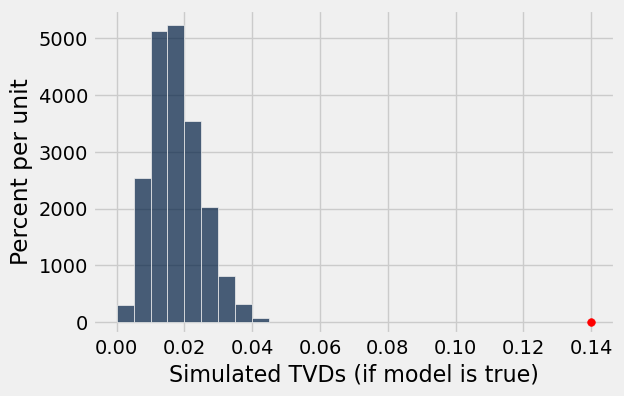

In [20]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)
print('Observed TVD: ' + str(obsvd_tvd))

# Plotting details; ignore this code
plots.ylim(-2, 55)
plots.scatter(obsvd_tvd, 0, color='red', s=30);

---
back to slides

---